## **Time Series Forecasting - ARIMA**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Time Series Forecasting</h2>
</div>



##  ARIMA Forecasting for Each Restaurant


In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 
# import pandas_profiling

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Track time
import time
import datetime
import calendar


# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


# Time Series Models
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


# Statistics
import scipy.stats
import warnings
from tqdm import tqdm

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#df_univariate = Past + Future
#df_tsf = Past
#df_tsf_restaurant = Single restaurent id
#ts= training dataset of single restaurent id

In [3]:
# import
df_univariate = pd.read_csv("df_univariate.csv")
df_univariate.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
2,past,air_fd6aac1043520e83_2016-01-13,air_fd6aac1043520e83,2016-01-13,40,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Izakaya,air_fd6aac1043520e83_2,air_fd6aac1043520e83_2_0,35.272727,37.5,9.0,60.0
3,past,air_64d4491ad8cdb1c6_2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_64d4491ad8cdb1c6_2,air_64d4491ad8cdb1c6_2_0,15.938462,15.0,4.0,55.0
4,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0


In [4]:
print("Earliest Date :", df_univariate.visit_date.min())
print("Latest Date   :", df_univariate.visit_date.max())

Earliest Date : 2016-01-01
Latest Date   : 2017-05-31


We will exclude submission data and take past data alone and split it into training and test datasets.

In [5]:
# Filter the historical data
pd
df_tsf = df_univariate.loc[df_univariate.dataset == "past",]
df_tsf.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
2,past,air_fd6aac1043520e83_2016-01-13,air_fd6aac1043520e83,2016-01-13,40,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Izakaya,air_fd6aac1043520e83_2,air_fd6aac1043520e83_2_0,35.272727,37.5,9.0,60.0
3,past,air_64d4491ad8cdb1c6_2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_64d4491ad8cdb1c6_2,air_64d4491ad8cdb1c6_2_0,15.938462,15.0,4.0,55.0
4,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>12a. ARIMA Forecasting using Statsmodels</h2>
</div>

In [6]:
from statsmodels.tsa.arima.model import ARIMA

**Get unique restaurant IDs**

In [7]:
df_tsf.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
2,past,air_fd6aac1043520e83_2016-01-13,air_fd6aac1043520e83,2016-01-13,40,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Izakaya,air_fd6aac1043520e83_2,air_fd6aac1043520e83_2_0,35.272727,37.5,9.0,60.0
3,past,air_64d4491ad8cdb1c6_2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_64d4491ad8cdb1c6_2,air_64d4491ad8cdb1c6_2_0,15.938462,15.0,4.0,55.0
4,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0


In [8]:
df_tsf.shape

(250468, 46)

In [9]:
air_store_id = df_tsf.air_store_id.unique()

In [10]:
len(air_store_id)

821

In [11]:
air_store_id[10]

'air_d00161e19f08290b'

**Create Train and Test Data**

In [12]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT25
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[10], :]

In [13]:
 df_tsf_restaurant.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
10,past,air_d00161e19f08290b_2016-01-13,air_d00161e19f08290b,2016-01-13,58,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,1.0,2.0,18.0,10.0,8.0,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_2,air_d00161e19f08290b_2_0,30.184615,26.0,5.0,72.0
269,past,air_d00161e19f08290b_2016-01-14,air_d00161e19f08290b,2016-01-14,23,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_3,air_d00161e19f08290b_3_0,24.016393,22.0,2.0,74.0
541,past,air_d00161e19f08290b_2016-01-15,air_d00161e19f08290b,2016-01-15,7,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_4,air_d00161e19f08290b_4_0,32.892308,31.0,2.0,69.0
828,past,air_d00161e19f08290b_2016-01-16,air_d00161e19f08290b,2016-01-16,48,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_5,air_d00161e19f08290b_5_0,31.174603,29.0,4.0,87.0
1332,past,air_d00161e19f08290b_2016-01-19,air_d00161e19f08290b,2016-01-19,57,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_1,air_d00161e19f08290b_1_0,24.569231,22.0,2.0,58.0


In [14]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_d00161e19f08290b_2016-01-13,air_d00161e19f08290b,2016-01-13,58,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,1.0,2.0,18.0,10.0,8.0,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_2,air_d00161e19f08290b_2_0,30.184615,26.0,5.0,72.0
1,past,air_d00161e19f08290b_2016-01-14,air_d00161e19f08290b,2016-01-14,23,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_3,air_d00161e19f08290b_3_0,24.016393,22.0,2.0,74.0
2,past,air_d00161e19f08290b_2016-01-15,air_d00161e19f08290b,2016-01-15,7,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_4,air_d00161e19f08290b_4_0,32.892308,31.0,2.0,69.0
3,past,air_d00161e19f08290b_2016-01-16,air_d00161e19f08290b,2016-01-16,48,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_5,air_d00161e19f08290b_5_0,31.174603,29.0,4.0,87.0
4,past,air_d00161e19f08290b_2016-01-19,air_d00161e19f08290b,2016-01-19,57,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_1,air_d00161e19f08290b_1_0,24.569231,22.0,2.0,58.0


In [15]:
# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant['visit_date'] < '2017-02-01'
test_selector = df_tsf_restaurant['visit_date']>= '2017-02-01'

train = df_tsf_restaurant[train_selector]
test = df_tsf_restaurant[test_selector]

In [16]:
train

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_d00161e19f08290b_2016-01-13,air_d00161e19f08290b,2016-01-13,58,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,1.0,2.0,18.0,10.0,8.0,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_2,air_d00161e19f08290b_2_0,30.184615,26.0,5.0,72.0
1,past,air_d00161e19f08290b_2016-01-14,air_d00161e19f08290b,2016-01-14,23,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_3,air_d00161e19f08290b_3_0,24.016393,22.0,2.0,74.0
2,past,air_d00161e19f08290b_2016-01-15,air_d00161e19f08290b,2016-01-15,7,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_4,air_d00161e19f08290b_4_0,32.892308,31.0,2.0,69.0
3,past,air_d00161e19f08290b_2016-01-16,air_d00161e19f08290b,2016-01-16,48,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_5,air_d00161e19f08290b_5_0,31.174603,29.0,4.0,87.0
4,past,air_d00161e19f08290b_2016-01-19,air_d00161e19f08290b,2016-01-19,57,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_1,air_d00161e19f08290b_1_0,24.569231,22.0,2.0,58.0
5,past,air_d00161e19f08290b_2016-01-20,air_d00161e19f08290b,2016-01-20,14,Wednesday,0,0,0,0,0,1,2,2016,1,20,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_2,air_d00161e19f08290b_2_0,30.184615,26.0,5.0,72.0
6,past,air_d00161e19f08290b_2016-01-21,air_d00161e19f08290b,2016-01-21,22,Thursday,0,0,0,0,0,1,3,2016,1,21,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_3,air_d00161e19f08290b_3_0,24.016393,22.0,2.0,74.0
7,past,air_d00161e19f08290b_2016-01-22,air_d00161e19f08290b,2016-01-22,41,Friday,0,0,0,0,0,1,4,2016,1,22,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,1.0,29.0,18.0,8.0,394.0,Tōkyō-to Shinjuku-ku Kabukichō_Dining ba

**Creating Time Series dataset for single restaurant id**

In [17]:
ts = train.loc[:, ['visit_date', 'visitors']]
ts['visit_date'] = pd.to_datetime(ts['visit_date'])
ts.set_index('visit_date', inplace=True)

In [18]:
ts.head()

,visitors
visit_date,
2016-01-13,58
2016-01-14,23
2016-01-15,7
2016-01-16,48
2016-01-19,57


**Plot**

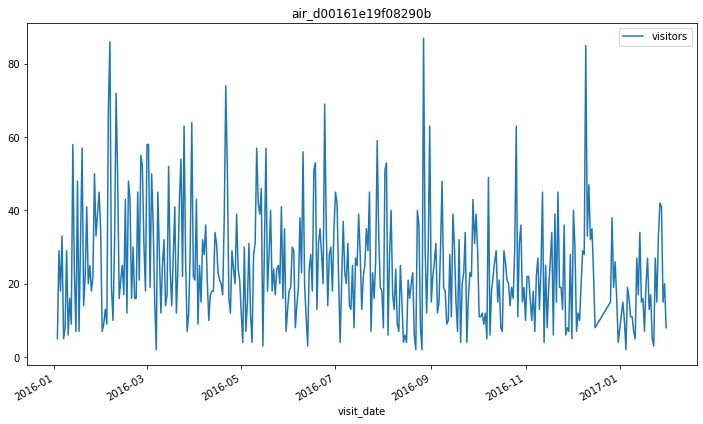

In [19]:
# Plot
ts.plot(figsize=(12, 7), title=df_tsf_restaurant.air_store_id.values[0]);

**ADF Test for Stationarity**

The Augmented Dickey Fuller Test tests for stationarity 

In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
result = adfuller(ts.dropna())
print('ADF Statistic:',result[0])
print('p-value:',result[1])
if result[1] >= 0.05:
    print('Inference: The time series is non-stationary')
else:
    print('Inference: The time series is stationary')


ADF Statistic: -2.2459344501092318
p-value: 0.1899980679425356
Inference: The time series is non-stationary


**Check First order differenced series**

In [21]:
# First Order Differenced
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts.diff().dropna())
print('ADF Statistic:',result[0])
if result[1] >= 0.05:
    print('Inference: The time series is non-stationary')
else:
    print('Inference: The time series is stationary') 

ADF Statistic: -9.146541610960211
Inference: The time series is stationary


### Determining P and Q

**ACF and PACF Plots**

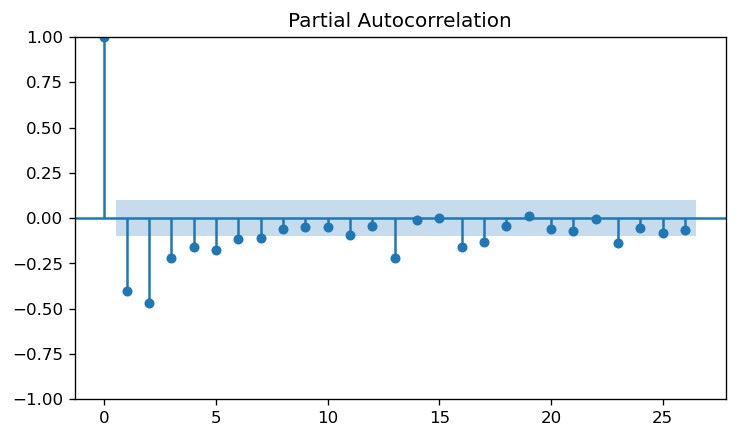

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(7, 4), 'figure.dpi':120})
plot_pacf(ts.diff().dropna());

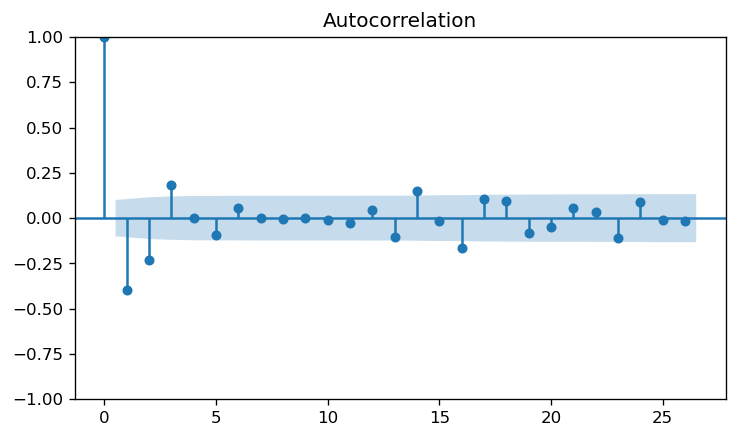

In [23]:
# ACF plot of 1st differenced series
plot_acf(ts.diff().dropna());

In [66]:
ts

,visitors
visit_date,
2016-01-13,58
2016-01-14,23
2016-01-15,7
2016-01-16,48
2016-01-19,57
2016-01-20,14
2016-01-21,22
2016-01-22,41
2016-01-23,20


Train the ARIMA model


In [68]:
# Orders to try
order = (5, 1, 2)
order = (4, 1, 2)

# Train model
model = ARIMA(endog=ts, order=order)
fit = model.fit()

In [69]:
fit.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               visitors   No. Observations:                  383
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1561.773
Date:                Thu, 19 Jan 2023   AIC                           3137.545
Time:                        12:13:09   BIC                           3165.163
Sample:                             0   HQIC                          3148.502
                                - 383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8928      0.090     -9.914      0.000      -1.069      -0.716
ar.L2         -0.0955      0.072     -1.319      0.187      -0.237       0.046
ar.L3         -0.0159      0.075     -0.211      0.833      -0.163       0.132
ar.L4          0.1494      0.052      2.898      0.004       0.048       0.250
ma.L1         -0.0151      0.078     -0.193      0.847      -0.168       0.138
ma.L2         -0.9273      0.074    -12.607      0.000      -1.071      -0.783
sigma2       206.7087     14.324     14.430      0.000     178.633     234.784
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               110.38
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Get prediction for test duration**

In [70]:
predictions = pd.Series(fit.forecast(len(test)))

predictions.head()

383    12.741493
384    19.618397
385    17.398347
386    14.119398
387    18.305858
Name: predicted_mean, dtype: float64

**Converting Negative Predictions into 0**

In [71]:
predictions = predictions.map(lambda x: x if x >= 0 else 0)

predictions.head()

383    12.741493
384    19.618397
385    17.398347
386    14.119398
387    18.305858
Name: predicted_mean, dtype: float64

In [72]:
predictions=predictions.reset_index()

In [73]:
predictions.head()

,index,predicted_mean
0,383,12.741493
1,384,19.618397
2,385,17.398347
3,386,14.119398
4,387,18.305858


In [74]:
predictions=predictions.drop(['index'],axis=1)

In [75]:
predictions.head()

,predicted_mean
0,12.741493
1,19.618397
2,17.398347
3,14.119398
4,18.305858


In [76]:
predictions.rename({'predicted_mean':'predictions'},inplace=True,axis=1)

In [77]:
predictions

,predictions
0,12.741493
1,19.618397
2,17.398347
3,14.119398
4,18.305858
5,15.943977
6,17.373193
7,15.766553
8,17.727242
9,15.754768


In [78]:
actuals = test['visitors']

actuals.head()

162892    86
163606    45
164355    64
165130    10
165890     2
Name: visitors, dtype: int64

In [79]:
actuals.reset_index(drop=True).head()

0    86
1    45
2    64
3    10
4     2
Name: visitors, dtype: int64

**Test Actuals vs Test Predictions**

In [80]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [81]:
def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

In [88]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(actuals,predictions['predictions'].values))
print("\n RMSLE : \n", RMSLE(actuals,predictions['predictions'].values))
print("\n MAPE : \n", mean_absolute_percentage_error(actuals,predictions['predictions'].values))


 MAE : 
  32.70414873425784

 RMSLE : 
 1.1657603707152109

 MAPE : 
 124.84948953261339


**Plot Actual vs Predicted**

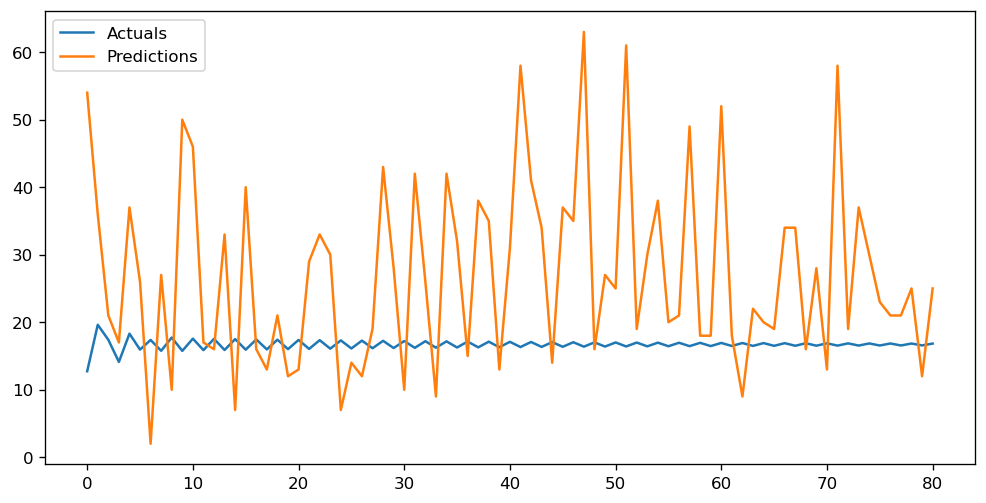

In [40]:
# plot predictions and actual values 
plt.figure(figsize=(10,5))
plt.plot(predictions.values, label='Actuals');
plt.plot(actuals.values, label='Predictions');
plt.legend(loc='best');

### **Durbin Watson Statistic & Check for Pattern in Errors**


Line Plot

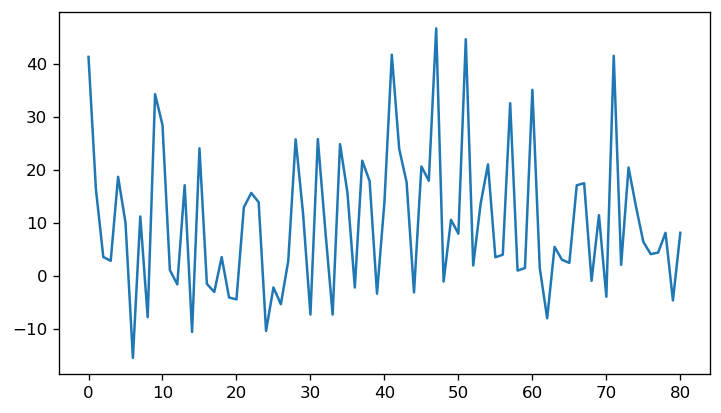

In [41]:
errors = (actuals.values-predictions['predictions'].values)
plt.plot(errors);

**Check Auto Correlation**

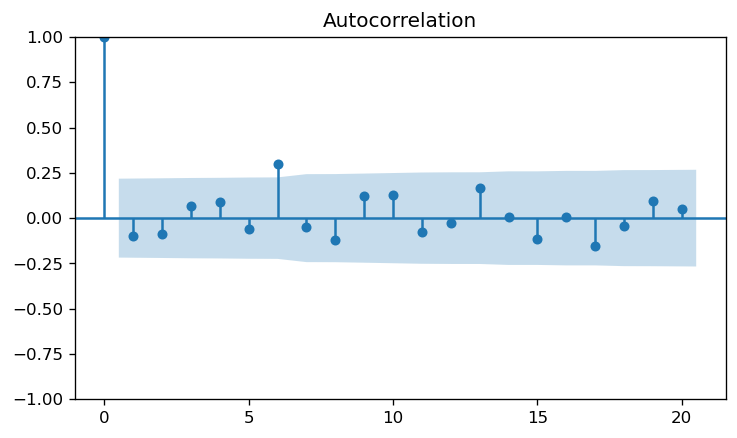

In [42]:
plot_acf(errors);

**Durbin Watson Statistic**

DW statistic is used to check for serial correlation.

When there is no autocorrelation, the value of the statistic equals 2. When closer to 0 -> implies positive serial correlation. When closer to 4 -> implies negative serial correlation.

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals.

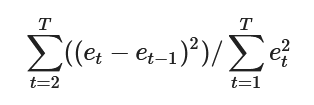

In [43]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(errors)

1.3863699898750814


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Auto ARIMA Modeled at Restaurant Level Time Series</h2>
</div>



In [44]:
air_store_id = df_tsf.air_store_id.unique()
air_store_id[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_fd6aac1043520e83', 'air_64d4491ad8cdb1c6',
       'air_ee3a01f0c71a769f', 'air_9438d67241c81314',
       'air_d0e8a085d8dc83aa', 'air_5c65468938c07fa5',
       'air_9fc607777ad76b26', 'air_326ca454ef3558bc'], dtype=object)

In [45]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[10], :]


# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
train = df_tsf_restaurant[train_selector]


test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
test = df_tsf_restaurant[test_selector]


In [46]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_d00161e19f08290b_2016-01-13,air_d00161e19f08290b,2016-01-13,58,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,1.0,2.0,18.0,10.0,8.0,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_2,air_d00161e19f08290b_2_0,30.184615,26.0,5.0,72.0
1,past,air_d00161e19f08290b_2016-01-14,air_d00161e19f08290b,2016-01-14,23,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_3,air_d00161e19f08290b_3_0,24.016393,22.0,2.0,74.0
2,past,air_d00161e19f08290b_2016-01-15,air_d00161e19f08290b,2016-01-15,7,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_4,air_d00161e19f08290b_4_0,32.892308,31.0,2.0,69.0
3,past,air_d00161e19f08290b_2016-01-16,air_d00161e19f08290b,2016-01-16,48,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_5,air_d00161e19f08290b_5_0,31.174603,29.0,4.0,87.0
4,past,air_d00161e19f08290b_2016-01-19,air_d00161e19f08290b,2016-01-19,57,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Dining bar,Tōkyō-to Shinjuku-ku Kabukichō,35.69384,139.703549,hpg_05fada27f04e4383,International cuisine,None None None,35.688589,139.731971,Tōkyō-to,Shinjuku-ku,Kabukichō,39,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinjuku-ku Kabukichō_Dining bar,air_d00161e19f08290b_1,air_d00161e19f08290b_1_0,24.569231,22.0,2.0,58.0


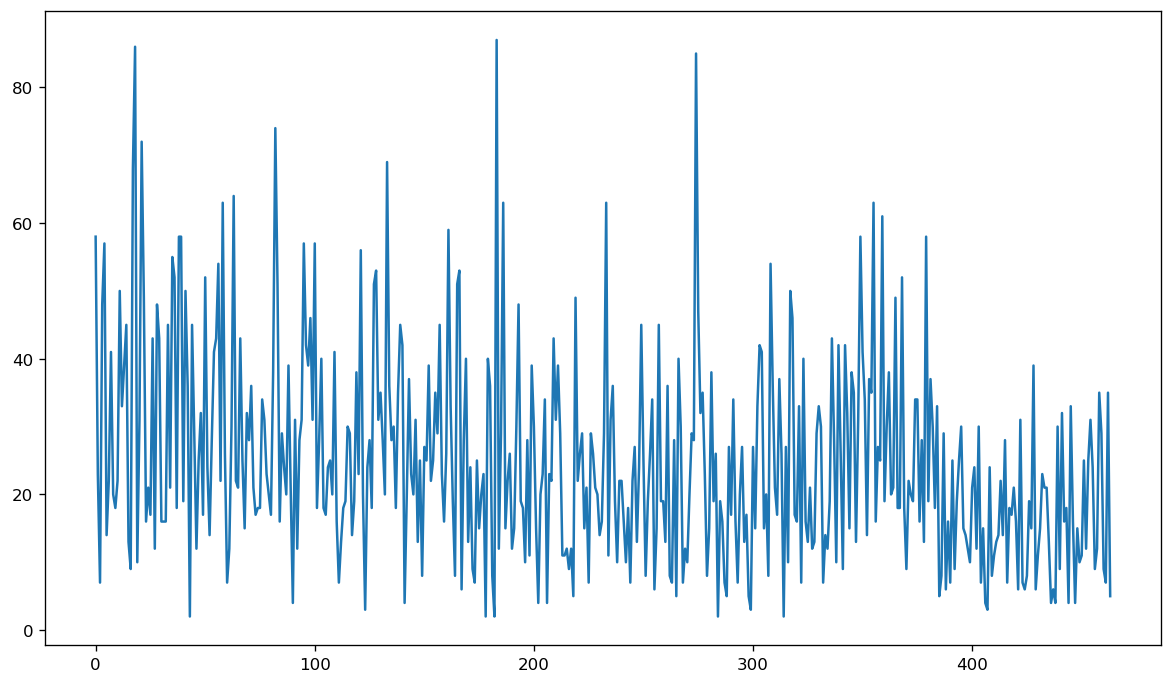

In [47]:
# Plot
df_tsf_restaurant.visitors.plot(figsize=(12, 7));

In [48]:
predictions.head()

,predictions
0,12.741493
1,19.618397
2,17.398347
3,14.119398
4,18.305858


In [49]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                          max_p = 7, max_q = 3, m = 30, 
                          seasonal = False, 
                          d = None, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)  
  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3381.657, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3316.473, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3379.675, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3221.412, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3204.367, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3197.205, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3186.384, Time=0.18 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=3182.392, Time=0.23 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=3179.151, Time=0.25 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=3177.217, Time=0.15 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=3180.447, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  383
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -1562.706
Date:                Thu, 19 Jan 2023   AIC                           3135.412
Time:                        12:12:07   BIC                           3155.139
Sample:                             0   HQIC                          3143.238
                                - 383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0605      0.049      1.224      0.221      -0.036       0.157
ar.L2         -0.1573      0.052     -3.028      0.002      -0.259      -0.055
ar.L3          0.1343      0.053      2.556      0.011       0.031       0.237
ma.L1         -0.9701      0.017    -55.815      0.000      -1.004      -0.936
sigma2       207.7495     14.240     14.589      0.000     179.840     235.659
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               112.52
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict

In [50]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
predictions = predictions.map(lambda x: x if x >= 0 else 0)



In [51]:
predictions.head()

383    11.789621
384    20.678766
385    16.120862
386    15.358394
387    17.222673
dtype: float64

In [52]:
predictions=predictions.reset_index()

In [53]:
predictions.head()

,index,0
0,383,11.789621
1,384,20.678766
2,385,16.120862
3,386,15.358394
4,387,17.222673


In [54]:
predictions=predictions.drop(['index'],axis=1)

In [55]:
predictions.head()

,0
0,11.789621
1,20.678766
2,16.120862
3,15.358394
4,17.222673


In [56]:
actuals = test['visitors'].reset_index(drop = True)
actuals.head()

0    54
1    36
2    21
3    17
4    37
Name: visitors, dtype: int64

#### Evaluate

In [89]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(actuals,predictions['predictions'].values))
print("\n RMSLE : \n", RMSLE(actuals,predictions['predictions'].values))
print("\n MAPE : \n", mean_absolute_percentage_error(actuals,predictions['predictions'].values))


 MAE : 
  32.70414873425784

 RMSLE : 
 1.1657603707152109

 MAPE : 
 124.84948953261339


#### Plot

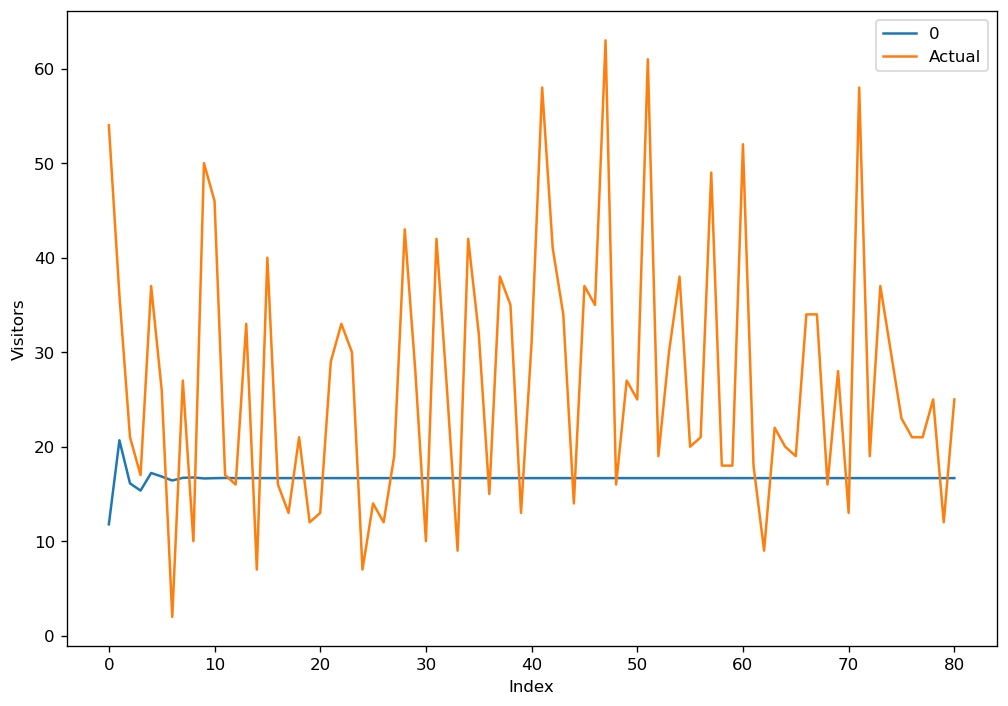

In [58]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Predictions", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7)) 
actuals.plot(legend = True, label = "Actual");

### Forecast and Evaluating for 'N' Restaurants

In [59]:
len(air_store_id)

821

air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2436.478, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2641.184, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2577.406, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2434.557, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2639.186, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2436.440, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2437.774, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2432.675, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2434.596, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2434.558, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2575.416, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2435.891, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.772 seconds

 MAE : 
  9.173835794649465

 RMSLE : 
 0.7408027871685045

 MAPE 

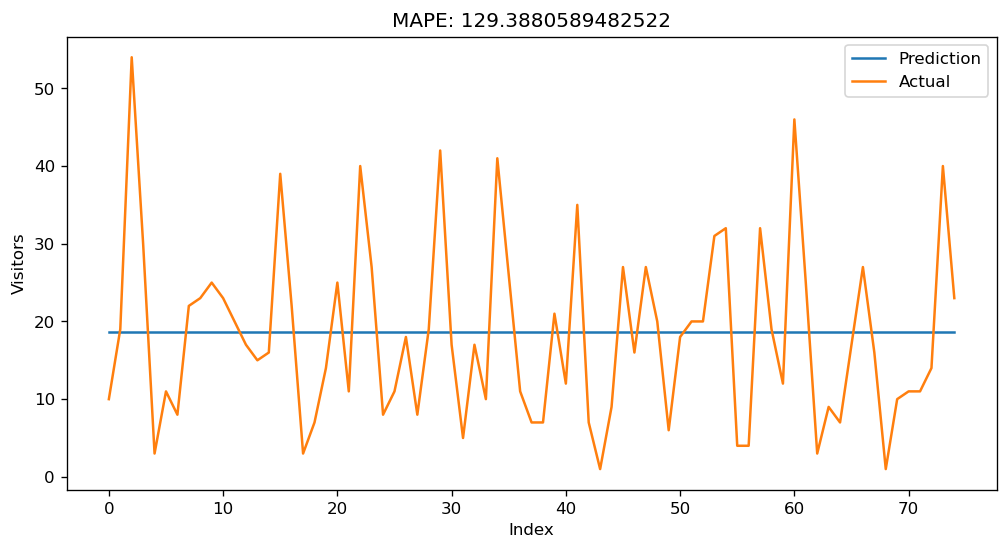

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1807.616, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1952.119, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1897.807, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1807.471, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1950.138, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1807.489, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1809.452, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1808.236, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.572 seconds

 MAE : 
  3.013918041829889

 RMSLE : 
 1.0785143254483076

 MAPE : 
 68.38940843875326


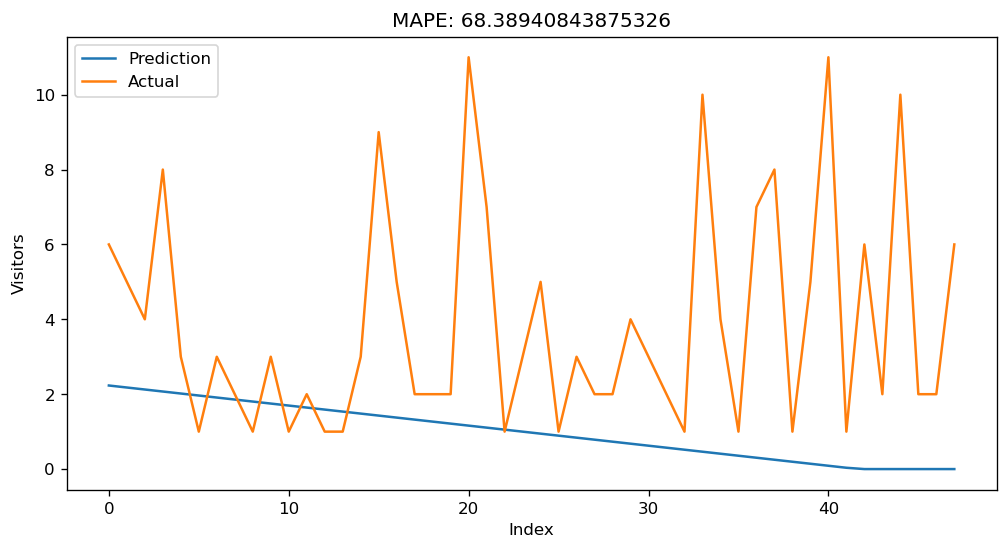

air_fd6aac1043520e83
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3122.338, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2772.199, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2954.670, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2720.592, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2686.010, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2675.127, Time=0.08 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2648.380, Time=0.06 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=2605.408, Time=0.19 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=

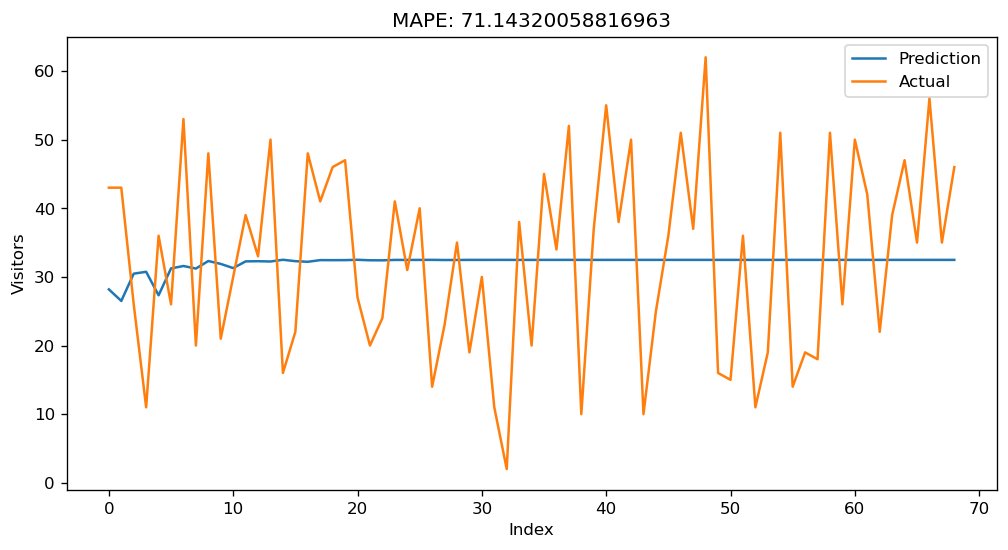

air_64d4491ad8cdb1c6
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2484.123, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2948.290, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.125, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2800.373, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2486.087, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2486.078, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2749.272, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2602.871, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2480.662, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2478.597, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2477.253, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2478.641, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.890 seconds

 MAE 

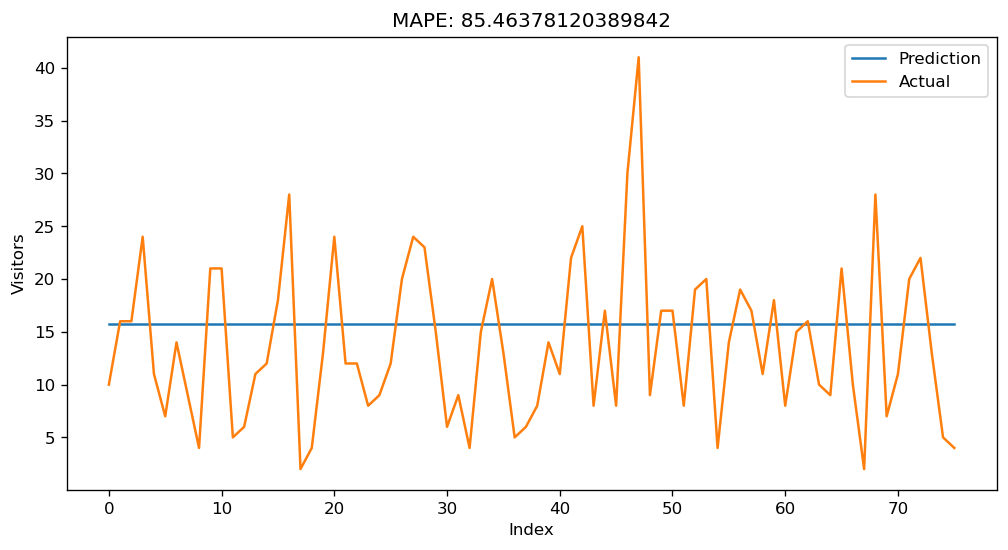

air_ee3a01f0c71a769f
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2597.632, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2747.196, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2701.716, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2597.487, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2745.212, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2596.757, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2600.093, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2590.873, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2589.634, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2572.479, Time=0.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2584.301, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2573.893, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2581.421, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=2571.017, Time=0.21 sec
 ARIMA(1,1,3

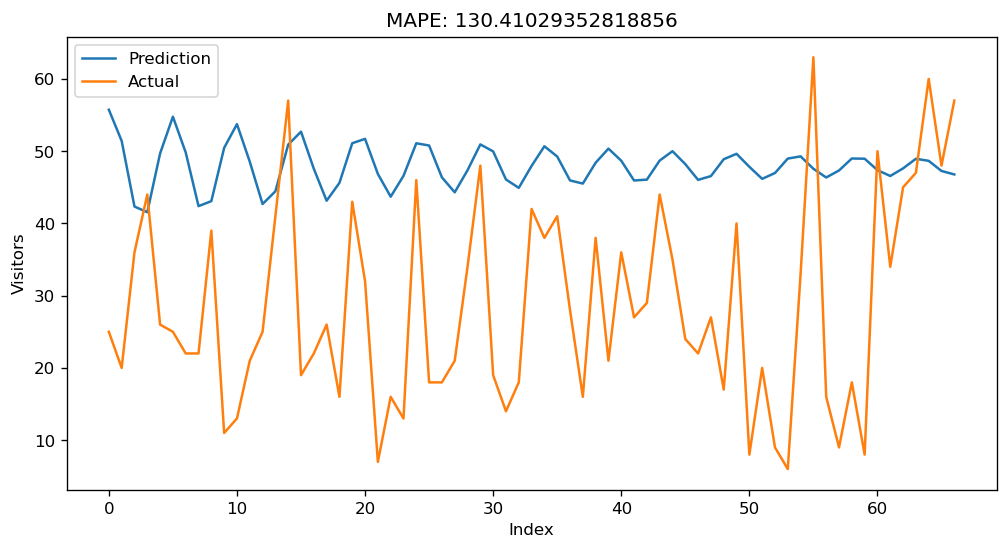

air_9438d67241c81314
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2890.312, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3182.086, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3051.548, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2896.719, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3180.087, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2888.750, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2972.494, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2890.111, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2889.860, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2890.308, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2948.073, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2891.705, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2886.773, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2888.357, Time=0.05 sec
 ARIMA(2,1,0

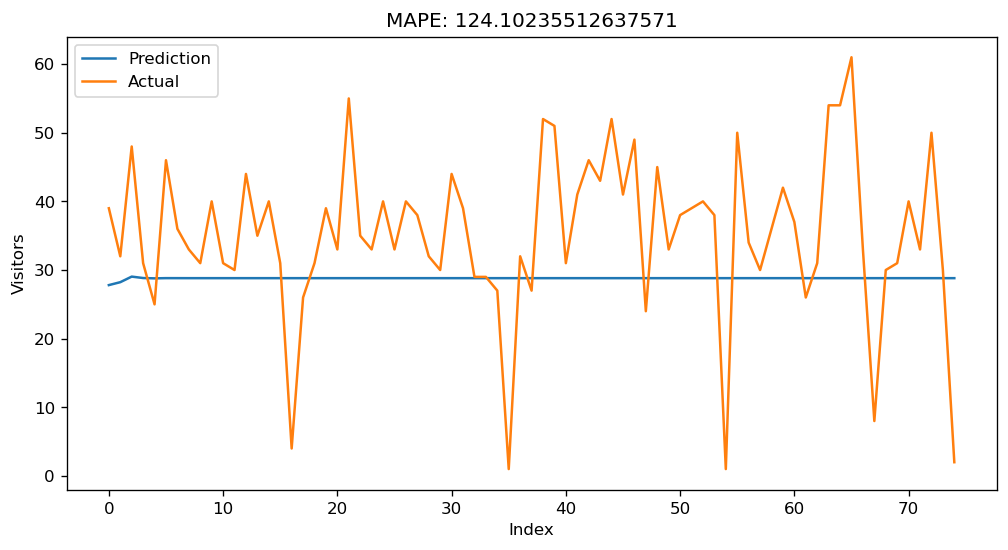

air_d0e8a085d8dc83aa
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2450.129, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3050.871, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2713.834, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2911.149, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2436.826, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2538.517, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2432.326, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2499.180, Time=0.05 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2433.417, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2424.588, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2426.360, Time=0.15 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2425.042, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2426.126, Time=0.31 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2425.189, Time=0.19 sec
 ARIMA(4,0,3

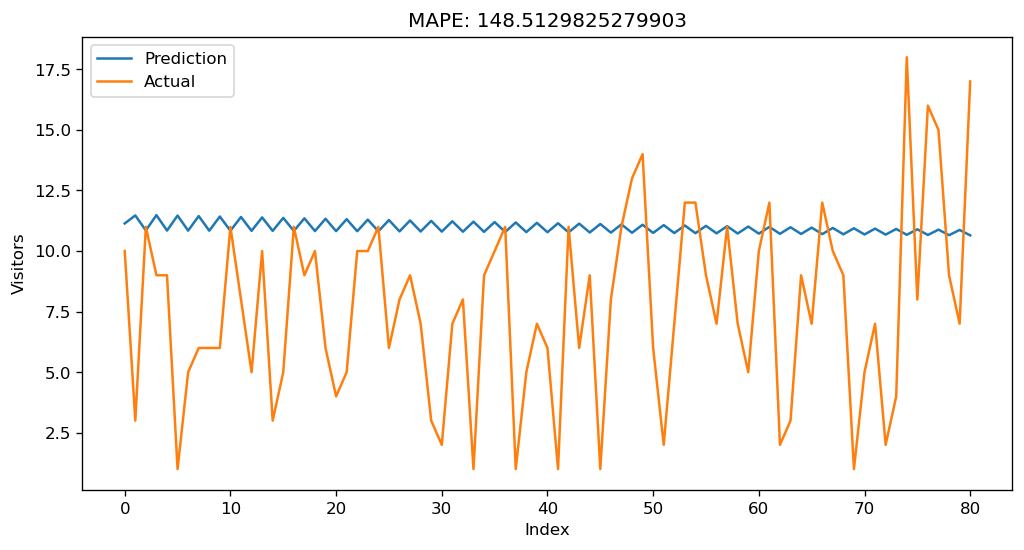

air_5c65468938c07fa5
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2852.684, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3052.364, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2960.937, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2850.885, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3050.364, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2852.678, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2854.668, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2848.950, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2850.747, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2850.740, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2958.942, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2852.730, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.736 seconds

 MAE : 
  9.737914479285049

 RMSLE : 
 0.8961614468164248

 MAPE 

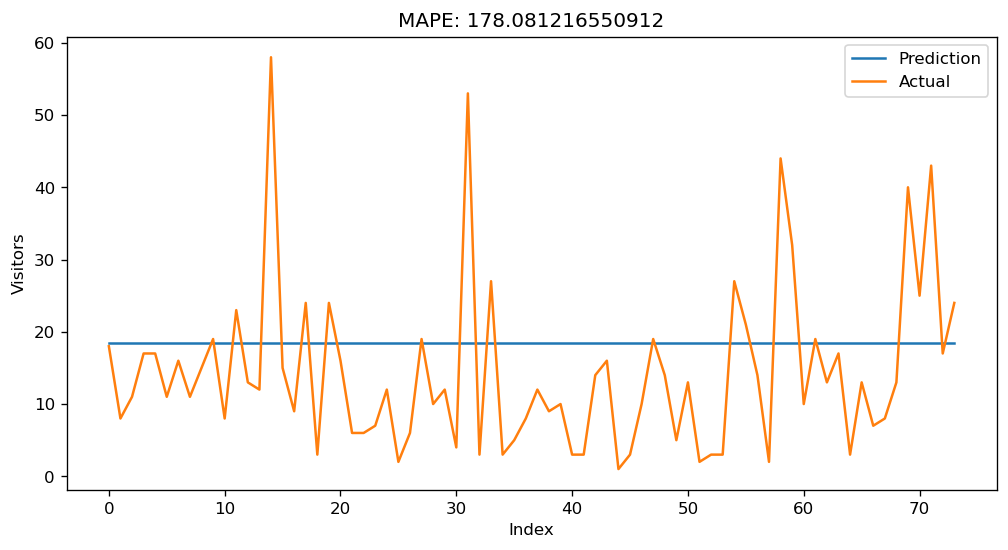

air_9fc607777ad76b26
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2192.184, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2382.097, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2292.057, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2191.972, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2380.099, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2191.993, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2192.975, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2189.973, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2190.184, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2189.994, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2290.059, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2190.975, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.559 seconds

 MAE : 
  7.339822264765344

 RMSLE : 
 0.6956114166384528

 MAPE 

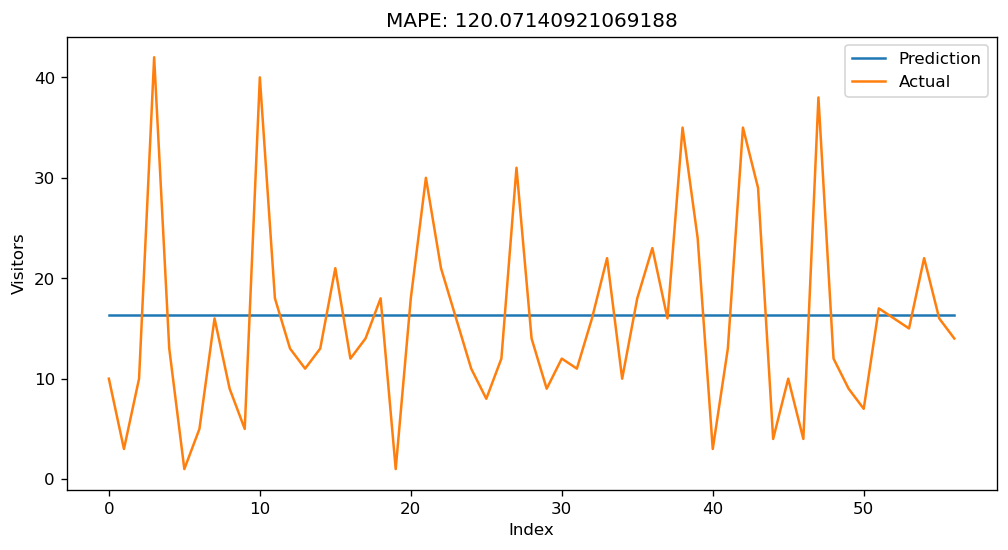

air_326ca454ef3558bc
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3153.428, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3572.081, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3306.366, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3424.287, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3162.847, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3152.473, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3379.384, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3156.621, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=3150.506, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3345.881, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3154.568, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3146.962, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=3144.808, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3142.989, Time=0.08 sec
 ARIMA(0,0,1

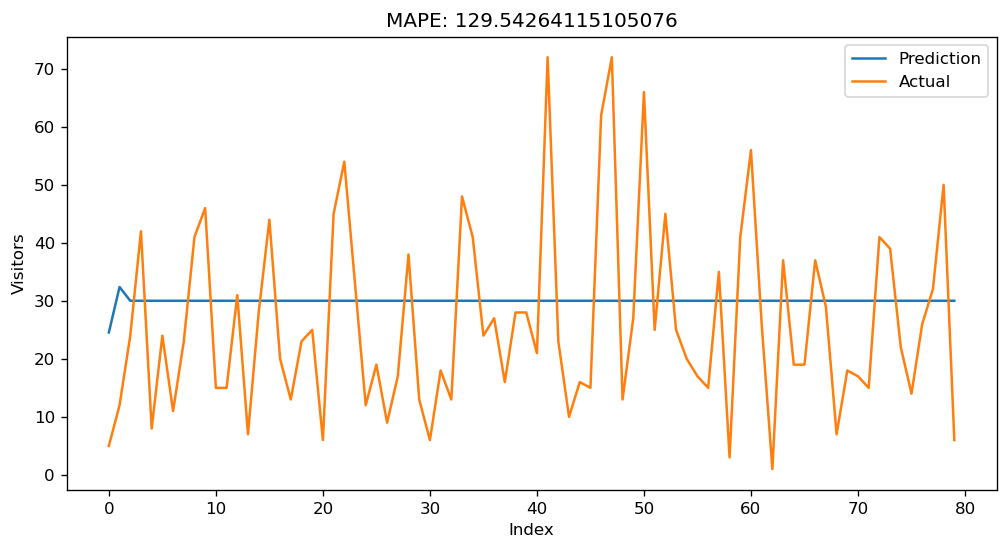

air_d00161e19f08290b
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3381.657, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3316.473, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3379.675, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3221.412, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3204.367, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3197.205, Time=0.14 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3186.384, Time=0.17 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=3182.392, Time=0.20 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=3179.151, Time=0.23 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=3177.217, Time=0.14 sec
 ARIMA(6,1,0)(0,0,0)[0]         

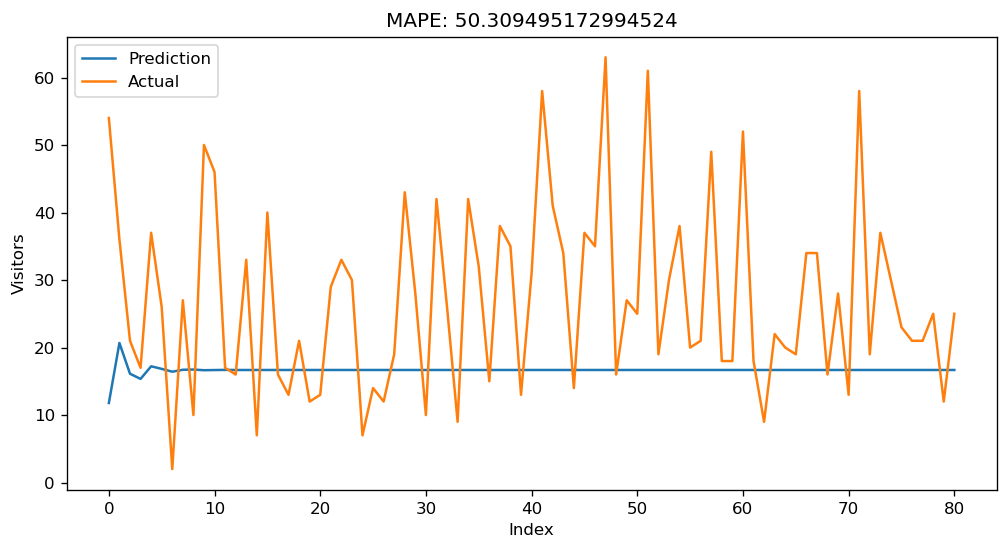

air_082908692355165e
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3187.249, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3421.999, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3306.213, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3187.134, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3420.010, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3187.249, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3189.242, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3185.679, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3185.677, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3304.231, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3187.644, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3187.664, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3185.667, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3187.658, Time=0.07 sec
 ARIMA(1,1,3

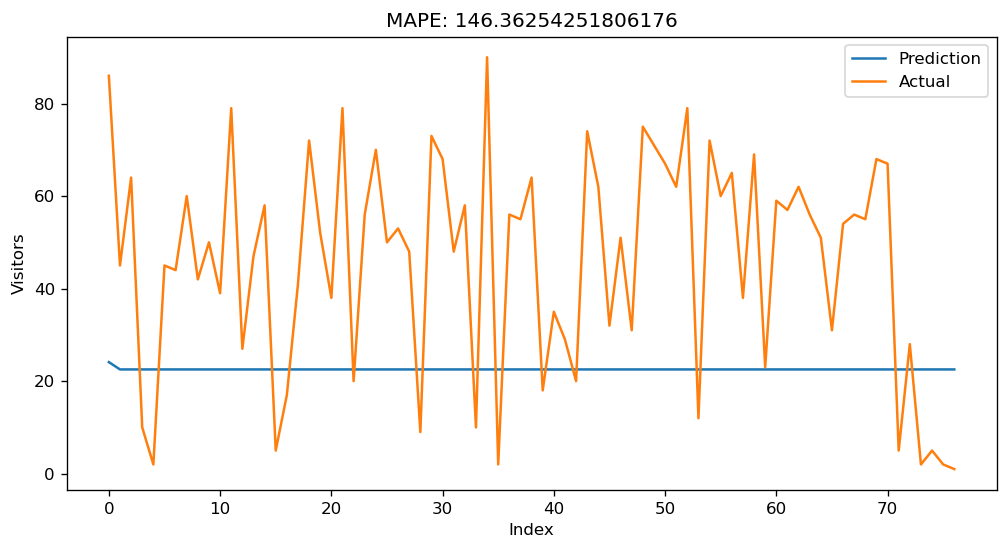

In [91]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(12):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]

    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]

    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                            max_p = 7, max_q = 3, m = 30, 
                            seasonal = False, 
                            d = None, trace = True, 
                            error_action ='ignore',   
                            suppress_warnings = True,  
                            stepwise = True)  

    # To print the summary 
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(len(test)))
    predictions = predictions.map(lambda x: x if x >= 0 else 0)

    actuals = test['visitors'].reset_index(drop = True)
    predictions=predictions.reset_index(drop = True)

    # Evaluation Metric
    mape  =  mean_absolute_percentage_error(actuals,predictions)
    rmsle = RMSLE(actuals,predictions)
    mae = mean_absolute_error(actuals,predictions)

    # Evaluation Metric
    print("\n MAE : \n ",mae )
    print("\n RMSLE : \n", rmsle)
    print("\n MAPE : \n",mape)
    
    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values 
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 5)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

#### Errors

**Replace Inf with NaN, to calculate mean**

In [61]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate mean

In [62]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  115.15 [129.39  68.39  71.14  85.46 130.41 124.1  148.51 178.08 120.07 129.54
  50.31 146.36]
MAES  :  11.59 [ 9.17  3.01 12.32  6.38 20.83 10.36  4.16  9.74  7.34 13.84 12.78 29.1 ]
RMSLES:  0.76 [0.74 1.08 0.55 0.61 0.82 0.65 0.72 0.9  0.7  0.75 0.64 1.01]
